In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
dataset = pd.read_csv("hindi_news_dataset.csv")


In [3]:
dataset['News'] = dataset["Headline"] + " " + dataset["Content"]
dataset = dataset.drop(["Headline" , "Content" , "Unnamed: 4" , "Unnamed: 5" , "Date"] , axis=1)

In [4]:
dataset.head()

,News Categories,News
0,['national'],कांग्रेस नेता बलजिंदर सिंह की पंजाब में घर के ...
1,"['politics', 'national']",केंद्रीय मंत्री बोले- महिला आरक्षण लाने का साह...
2,"['business', 'national']",ओपीएस लागू करने से अस्थिर हो सकती है राज्यों क...
3,['national'],तमिलनाडु में शावरमा खाने से 14 वर्षीय छात्रा क...
4,['national'],मणिपुर में मुख्यमंत्री के आश्वासन के बाद मारे ...


In [5]:
dataset.shape

(185511, 2)

In [6]:
dataset["News Categories"].value_counts().head(15)

News Categories
['entertainment']                                19478
['national']                                     16303
['politics', 'national']                         16030
['miscellaneous']                                15971
['business']                                     14411
['world']                                        13806
['technology']                                   13608
['sports']                                        7924
['world', 'national']                             7338
['sports', 'आईपीएल_2024']                         4921
['politics', 'national', 'लोकसभा_चुनाव_2024']     3916
['national', 'technology']                        3815
['business', 'national']                          3789
['politics']                                      3635
['विश्व_कप_2023', 'sports']                       3378
Name: count, dtype: int64

In [7]:
top9_categories = dataset["News Categories"].value_counts().head(9).index.tolist()


In [8]:
print(top9_categories)

["['entertainment']", "['national']", "['politics', 'national']", "['miscellaneous']", "['business']", "['world']", "['technology']", "['sports']", "['world', 'national']"]


In [9]:
dataset = dataset[dataset['News Categories'].isin(top9_categories)]

In [10]:
dataset.head()

,News Categories,News
0,['national'],कांग्रेस नेता बलजिंदर सिंह की पंजाब में घर के ...
1,"['politics', 'national']",केंद्रीय मंत्री बोले- महिला आरक्षण लाने का साह...
3,['national'],तमिलनाडु में शावरमा खाने से 14 वर्षीय छात्रा क...
4,['national'],मणिपुर में मुख्यमंत्री के आश्वासन के बाद मारे ...
5,['national'],लोकसभा और विधानसभाओं में महिलाओं को 33% आरक्षण...


In [11]:
dataset.shape

(124869, 2)

In [12]:
dataset["News Categories"].value_counts().head

<bound method NDFrame.head of News Categories
['entertainment']           19478
['national']                16303
['politics', 'national']    16030
['miscellaneous']           15971
['business']                14411
['world']                   13806
['technology']              13608
['sports']                   7924
['world', 'national']        7338
Name: count, dtype: int64>

In [13]:
dataset = dataset.sample(frac = 1).reset_index(drop = True)

In [14]:
dataset.head()

,News Categories,News
0,['world'],शर्मिंदगी भरा है: नाज़ियों की तरफ से लड़ने वाले ...
1,['technology'],नासा द्वारा शेयर की गई तस्वीर में प्लूटो पर दि...
2,['entertainment'],"Vikrant Massey ने बेटे के साथ मनाया फादर्स डे,..."
3,['national'],जिम में वर्कआउट करते समय हार्ट अटैक आने के बाद...
4,"['politics', 'national']","आयातित माल बर्दाश्त नहीं, अध्यक्ष संगठन के मूल..."


In [15]:
dataset.shape

(124869, 2)

In [16]:
print(dataset['News Categories'].apply(len))

0          9
1         14
2         17
3         12
4         24
          ..
124864     9
124865     9
124866    12
124867    24
124868    12
Name: News Categories, Length: 124869, dtype: int64


In [17]:
print(dataset['News Categories'].apply(type))

0         <class 'str'>
1         <class 'str'>
2         <class 'str'>
3         <class 'str'>
4         <class 'str'>
              ...      
124864    <class 'str'>
124865    <class 'str'>
124866    <class 'str'>
124867    <class 'str'>
124868    <class 'str'>
Name: News Categories, Length: 124869, dtype: object


In [18]:
import ast

In [19]:
# Step 2: Convert string representations of lists to actual lists
dataset['News Categories'] = dataset['News Categories'].apply(ast.literal_eval)



In [20]:
print(dataset['News Categories'].apply(type))

0         <class 'list'>
1         <class 'list'>
2         <class 'list'>
3         <class 'list'>
4         <class 'list'>
               ...      
124864    <class 'list'>
124865    <class 'list'>
124866    <class 'list'>
124867    <class 'list'>
124868    <class 'list'>
Name: News Categories, Length: 124869, dtype: object


In [21]:
dataset['News Categories'] = dataset['News Categories'].apply(lambda x: ', '.join(x))

In [22]:
print(dataset['News Categories'].apply(type))

0         <class 'str'>
1         <class 'str'>
2         <class 'str'>
3         <class 'str'>
4         <class 'str'>
              ...      
124864    <class 'str'>
124865    <class 'str'>
124866    <class 'str'>
124867    <class 'str'>
124868    <class 'str'>
Name: News Categories, Length: 124869, dtype: object


In [23]:
dataset.head()


,News Categories,News
0,world,शर्मिंदगी भरा है: नाज़ियों की तरफ से लड़ने वाले ...
1,technology,नासा द्वारा शेयर की गई तस्वीर में प्लूटो पर दि...
2,entertainment,"Vikrant Massey ने बेटे के साथ मनाया फादर्स डे,..."
3,national,जिम में वर्कआउट करते समय हार्ट अटैक आने के बाद...
4,"politics, national","आयातित माल बर्दाश्त नहीं, अध्यक्ष संगठन के मूल..."


In [24]:
dataset.shape

(124869, 2)

In [25]:
dataset["News Categories"].value_counts().head

<bound method NDFrame.head of News Categories
entertainment         19478
national              16303
politics, national    16030
miscellaneous         15971
business              14411
world                 13806
technology            13608
sports                 7924
world, national        7338
Name: count, dtype: int64>

In [26]:
filtered_dataset = dataset[dataset['News Categories'].str.count(',') == 0]

In [27]:
print(filtered_dataset)
filtered_dataset.shape

       News Categories                                               News
0                world  शर्मिंदगी भरा है: नाज़ियों की तरफ से लड़ने वाले ...
1           technology  नासा द्वारा शेयर की गई तस्वीर में प्लूटो पर दि...
2        entertainment  Vikrant Massey ने बेटे के साथ मनाया फादर्स डे,...
3             national  जिम में वर्कआउट करते समय हार्ट अटैक आने के बाद...
5             national  छत्तीसगढ़ में सुरक्षाबलों संग मुठभेड़ में मारे...
...                ...                                                ...
124863   miscellaneous  क्या था 'केबीसी 15' में ₹7 करोड़ का सवाल जिसका...
124864           world  कपल ने इज़रायल में युद्ध के बीच सेना के साथ जु...
124865           world  अमेरिकी राष्ट्रपति बाइडन की तरह मज़ाक की पात्र ...
124866        business  बाज़ार पूंजीकरण के लिहाज़ से भारत के सबसे बड़े...
124868        business  पेटीएम ने निकाले गए कर्मचारियों से बोनस वापस म...

[101501 rows x 2 columns]


(101501, 2)

In [28]:
shuffled_dataset = filtered_dataset.sample(frac=1).reset_index(drop=True)

In [29]:
shuffled_dataset.head()

,News Categories,News
0,national,पटना हाईकोर्ट ने कोचिंग संस्थान के संचालन के स...
1,national,अफसोस है: यूपीए सरकार में महिला आरक्षण बिल में...
2,business,जेट एयरवेज़ के संस्थापक नरेश गोयल को 11 सितंबर ...
3,national,"आज़म खान, उनकी पत्नी व बेटे को फर्ज़ी जन्म प्र..."
4,world,"हमारी सैकड़ों मिसाइलें हवा में दिखाई देंगी, एक..."


In [30]:
shuffled_dataset.shape

(101501, 2)

In [31]:
dataset = shuffled_dataset

In [32]:
dataset["News Categories"].value_counts().head

<bound method NDFrame.head of News Categories
entertainment    19478
national         16303
miscellaneous    15971
business         14411
world            13806
technology       13608
sports            7924
Name: count, dtype: int64>

In [33]:
News_Categories = ['entertainment', 'world' , 'sports' , 'business' , 'technology', 'national', 'miscellaneous']

pd.set_option('future.no_silent_downcasting', True)
dataset["News Categories"] = dataset["News Categories"].replace( News_Categories, [0,1,2,3,4,5,6] )

dataset.head(10)

,News Categories,News
0,5,पटना हाईकोर्ट ने कोचिंग संस्थान के संचालन के स...
1,5,अफसोस है: यूपीए सरकार में महिला आरक्षण बिल में...
2,3,जेट एयरवेज़ के संस्थापक नरेश गोयल को 11 सितंबर ...
3,5,"आज़म खान, उनकी पत्नी व बेटे को फर्ज़ी जन्म प्र..."
4,1,"हमारी सैकड़ों मिसाइलें हवा में दिखाई देंगी, एक..."
5,1,"हमारी सैकड़ों मिसाइलें हवा में दिखाई देंगी, एक..."
6,0,देव आनंद की जयंती पर पीएम ने शेयर कीं तस्वीरें...
7,4,भारत में जनवरी माह में बैन किए गए 67 लाख वॉट्स...
8,5,गरबा करते वक्त गुजरात में 24 घंटों के भीतर हार...
9,0,फिल्म इंडस्ट्री में बहुत प्रतिस्पर्धा है लेकिन...


In [34]:
import re


In [35]:
def remove_extra_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

dataset['News'] = dataset['News'].apply(remove_extra_whitespace)


In [36]:
dataset.head

<bound method NDFrame.head of        News Categories                                               News
0                    5  पटना हाईकोर्ट ने कोचिंग संस्थान के संचालन के स...
1                    5  अफसोस है: यूपीए सरकार में महिला आरक्षण बिल में...
2                    3  जेट एयरवेज़ के संस्थापक नरेश गोयल को 11 सितंबर ...
3                    5  आज़म खान, उनकी पत्नी व बेटे को फर्ज़ी जन्म प्र...
4                    1  हमारी सैकड़ों मिसाइलें हवा में दिखाई देंगी, एक...
...                ...                                                ...
101496               5  बिहार में दुकानदार द्वारा उधार के ₹100 मांगने ...
101497               0  इंतज़ार के लिए माफी मांगता हूं: बॉलीवुड में वाप...
101498               1  चीन की धमकियों के बाद अमेरिका ने ताइवान के लिए...
101499               0  मैं पत्थर की नहीं बनी हूं: ऋतिक के साथ रिश्ता ...
101500               1  अमेरिका में 13 वर्षीय लड़के ने दिखाई नकली बंदू...

[101501 rows x 2 columns]>

In [37]:
def remove_special_characters(text):
    # Remove characters that are not Hindi script or whitespace
    pattern = r'[^\u0900-\u097F\s]'
    return re.sub(pattern, '', text)

dataset['News'] = dataset['News'].apply(remove_special_characters)


In [38]:


text = "Sample text: Hello! 1234. नमस्ते। ये एक उदाहरण है।"

cleaned_text = remove_special_characters(text)
print(cleaned_text)

    नमस्ते। ये एक उदाहरण है।


In [39]:
dataset.head

<bound method NDFrame.head of        News Categories                                               News
0                    5  पटना हाईकोर्ट ने कोचिंग संस्थान के संचालन के स...
1                    5  अफसोस है यूपीए सरकार में महिला आरक्षण बिल में ...
2                    3  जेट एयरवेज़ के संस्थापक नरेश गोयल को  सितंबर तक...
3                    5  आज़म खान उनकी पत्नी व बेटे को फर्ज़ी जन्म प्रम...
4                    1  हमारी सैकड़ों मिसाइलें हवा में दिखाई देंगी एक ...
...                ...                                                ...
101496               5  बिहार में दुकानदार द्वारा उधार के  मांगने पर फ...
101497               0  इंतज़ार के लिए माफी मांगता हूं बॉलीवुड में वापस...
101498               1  चीन की धमकियों के बाद अमेरिका ने ताइवान के लिए...
101499               0  मैं पत्थर की नहीं बनी हूं ऋतिक के साथ रिश्ता स...
101500               1  अमेरिका में  वर्षीय लड़के ने दिखाई नकली बंदूक ...

[101501 rows x 2 columns]>

In [40]:
import unicodedata

def normalize_unicode(text):
    return unicodedata.normalize('NFKC', text)

dataset['News'] = dataset['News'].apply(normalize_unicode)

In [41]:
dataset.head

<bound method NDFrame.head of        News Categories                                               News
0                    5  पटना हाईकोर्ट ने कोचिंग संस्थान के संचालन के स...
1                    5  अफसोस है यूपीए सरकार में महिला आरक्षण बिल में ...
2                    3  जेट एयरवेज़ के संस्थापक नरेश गोयल को  सितंबर त...
3                    5  आज़म खान उनकी पत्नी व बेटे को फर्ज़ी जन्म प्रम...
4                    1  हमारी सैकड़ों मिसाइलें हवा में दिखाई देंगी एक ...
...                ...                                                ...
101496               5  बिहार में दुकानदार द्वारा उधार के  मांगने पर फ...
101497               0  इंतज़ार के लिए माफी मांगता हूं बॉलीवुड में वाप...
101498               1  चीन की धमकियों के बाद अमेरिका ने ताइवान के लिए...
101499               0  मैं पत्थर की नहीं बनी हूं ऋतिक के साथ रिश्ता स...
101500               1  अमेरिका में  वर्षीय लड़के ने दिखाई नकली बंदूक ...

[101501 rows x 2 columns]>

In [42]:
from bs4 import BeautifulSoup

In [43]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

dataset['News'] = dataset['News'].apply(remove_html_tags)

In [44]:
def remove_urls_and_emails(text):
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    return text

dataset['News'] = dataset['News'].apply(remove_urls_and_emails)

In [45]:
# from inltk.inltk import setup, tokenize
# from collections import Iterable 


# def tokenize_hindi(text):
#     tokens = tokenize(text, 'hi')
#     return tokens

# dataset['News'] = dataset['News'].apply(tokenize_hindi)


In [46]:
from indicnlp.tokenize import indic_tokenize

def itokenize_hindi(text):
    tokens =  indic_tokenize.trivial_tokenize(text)
    return tokens

dataset['News'] = dataset['News'].apply(itokenize_hindi)



In [47]:
dataset.head

<bound method NDFrame.head of        News Categories                                               News
0                    5  [पटना, हाईकोर्ट, ने, कोचिंग, संस्थान, के, संचा...
1                    5  [अफसोस, है, यूपीए, सरकार, में, महिला, आरक्षण, ...
2                    3  [जेट, एयरवेज़, के, संस्थापक, नरेश, गोयल, को, स...
3                    5  [आज़म, खान, उनकी, पत्नी, व, बेटे, को, फर्ज़ी, ...
4                    1  [हमारी, सैकड़ों, मिसाइलें, हवा, में, दिखाई, दे...
...                ...                                                ...
101496               5  [बिहार, में, दुकानदार, द्वारा, उधार, के, मांगन...
101497               0  [इंतज़ार, के, लिए, माफी, मांगता, हूं, बॉलीवुड,...
101498               1  [चीन, की, धमकियों, के, बाद, अमेरिका, ने, ताइवा...
101499               0  [मैं, पत्थर, की, नहीं, बनी, हूं, ऋतिक, के, साथ...
101500               1  [अमेरिका, में, वर्षीय, लड़के, ने, दिखाई, नकली,...

[101501 rows x 2 columns]>

In [48]:
# import snowballstemmer

# # Create a stemmer for Hindi
# hindi_stemmer = snowballstemmer.stemmer('hindi')

# # Example Hindi words
# words = ["चलना", "चलते", "चला", "चाल", "चलने", "चलती"]

# # Apply stemming
# stemmed_words = [hindi_stemmer.stem(word) for word in words]
# print("Stemmed Words:", stemmed_words)


In [49]:
# import snowballstemmer
# hindi_stemmer = snowballstemmer.stemmer('hindi')
# def stem_words(word):
#     return hindi_stemmer.stem(word)

# dataset['News'] = dataset['News'].apply(stem_words)

In [50]:
# from nltk.stem import PorterStemmer
# def stemming(text):
#     porter_stemmer = PorterStemmer()
#     return [porter_stemmer.stem(word) for word in text]

# dataset['News'] = dataset['News'].apply(stemming)

In [51]:
# from indicnlp import lemmatizer
# def lemmatize(text):
#     lemmatized_words = lemmatizer.lemmatize(text, 'hi')

# dataset['News'] = dataset['News'].apply(lemmatize)

In [52]:
dataset.head

<bound method NDFrame.head of        News Categories                                               News
0                    5  [पटना, हाईकोर्ट, ने, कोचिंग, संस्थान, के, संचा...
1                    5  [अफसोस, है, यूपीए, सरकार, में, महिला, आरक्षण, ...
2                    3  [जेट, एयरवेज़, के, संस्थापक, नरेश, गोयल, को, स...
3                    5  [आज़म, खान, उनकी, पत्नी, व, बेटे, को, फर्ज़ी, ...
4                    1  [हमारी, सैकड़ों, मिसाइलें, हवा, में, दिखाई, दे...
...                ...                                                ...
101496               5  [बिहार, में, दुकानदार, द्वारा, उधार, के, मांगन...
101497               0  [इंतज़ार, के, लिए, माफी, मांगता, हूं, बॉलीवुड,...
101498               1  [चीन, की, धमकियों, के, बाद, अमेरिका, ने, ताइवा...
101499               0  [मैं, पत्थर, की, नहीं, बनी, हूं, ऋतिक, के, साथ...
101500               1  [अमेरिका, में, वर्षीय, लड़के, ने, दिखाई, नकली,...

[101501 rows x 2 columns]>

In [53]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
custom_hindi_stopwords = {
    "अंदर","अत","अदि","अप","अपना","अपनि","अपनी","अपने","अभि","अभी","आदि"
    ,"आप","इंहिं","इंहें","इंहों","इतयादि","इत्यादि","इन","इनका","इन्हीं","इन्हें","इन्हों",
    "इस","इसका","इसकि","इसकी","इसके","इसमें","इसि","इसी","इसे","उंहिं","उंहें",
    "उंहों","उन","उनका","उनकि","उनकी","उनके","उनको","उन्हीं","उन्हें","उन्हों","उस"
    ,"उसके","उसि","उसी","उसे","एक","एवं","एस","एसे","ऐसे","ओर","और","कइ",
    "कई","कर","करता","करते","करना","करने","करें","कहते","कहा","का","काफि","काफ़ी"
    ,"कि","किंहें","किंहों","कितना","किन्हें","किन्हों","किया","किर","किस","किसि","किसी","किसे"
    ,"की","कुछ","कुल","के","को","कोइ","कोई","कोन","कोनसा","कौन","कौनसा","गया","घर",
    "जब","जहाँ","जहां","जा","जिंहें","जिंहों","जितना","जिधर","जिन","जिन्हें","जिन्हों","जिस","जिसे"
    ,"जीधर","जेसा","जेसे","जैसा","जैसे","जो","तक","तब","तरह","तिंहें","तिंहों","तिन","तिन्हें","तिन्हों"
    ,"तिस","तिसे","तो","था","थि","थी","थे","दबारा","दवारा","दिया","दुसरा","दुसरे","दूसरे","दो","द्वारा"
    ,"न","नहिं","नहीं","ना","निचे","निहायत","नीचे","ने","पर","पहले","पुरा","पूरा","पे","फिर","बनि","बनी"
    ,"बहि","बही","बहुत","बाद","बाला","बिलकुल","भि","भितर","भी","भीतर","मगर","मानो","मे","में","यदि"
    ,"यह","यहाँ","यहां","यहि","यही","या","यिह","ये","रखें","रवासा","रहा","रहे","ऱ्वासा","लिए","लिये","लेकिन"
    ,"व","वगेरह","वरग","वर्ग","वह","वहाँ","वहां","वहिं","वहीं","वाले","वुह","वे","वग़ैरह","संग","सकता","सकते",
    "सबसे","सभि","सभी","साथ","साबुत","साभ","सारा","से","सो","हि","ही","हुअ","हुआ","हुइ","हुई","हुए","हे",
    "हें","है","हैं","हो","होता","होति","होती","होते","होना","होने","उन्होंने" ,"हम" ,"तुम"
    ,"है", "था", "हूँ", "हैं", "थी", "थे", "और", "या", "लेकिन","ज़्यादा",
    "पर", "कि", "को", "से", "भी", "जो", "इस", "इन", "वह", "वे",
    "किया", "कर", "करना", "हो", "ही", "तो", "कौन", "किस", "कहाँ",
    "कैसे", "क्यों", "जब", "जैसे", "सकता", "रहा", "रहे", "रखी",
    "रखना", "रखते", "हम", "आप", "व", "था", "थी", "होता", "होती",
    "रही", "अपने", "अपना", "उस", "उसे", "इन्हें", "जिन्हें", "जिन",
    "तुम", "कुछ", "यहाँ", "वहाँ", "इसके", "उनके", "उनकी", "इसका",
    "इसके", "इनका", "इनके", "तब", "तरह", "उप", "द्वारा", "तक",
    "यदि", "जिस", "जिससे", "जैसा", "जिनसे", "साथ", "उनका", "इसी",
    "होते", "इत्यादि", "तक", "एवं", "ना", "नी", "सभी", "दूसरे","तरीके",
    "थोड़ा", "मात्र", "बिलकुल", "पूर्णतः", "वर्ग", "प्रकार", "लिए",
    "ज्यादा", "कम", "हमारे", "सकती", "करते", "उन्हें", "होना","इसलिए",
    "करती", "जरूरी", "तथा", "बड़ा", "किसी", "किसीका", "जिसका",
    "उसका", "किसने", "इन्होने", "उन्होने", "सकते", "आदि", "प्रति",
    "में", "थे", "हो", "सकता", "चाहिए", "लगभग", "बारे", "हर",
    "सब", "उसके", "इनमें", "ऐसे", "जाना", "करवा", "दिया", "देना",
    "दो", "तीन", "चार", "पांच", "छह", "सात", "आठ", "नौ", "दस",
    "इतना", "कितना", "उनका", "इसमें", "उधर", "कभी", "अभी", "सबसे",
    "शायद", "जितना", "जिसे", "मुझे", "तुझे", "वगैरह", "मानो", "मिली",
    "थोड़ी", "बाद", "सामने", "पीछे", "अंदर", "बाहर", "खास", 
    "हरएक", "कोई", "किसको", "किसका", "इनको", "इनका", "उन्हीं", 
    "उनमें", "ऐसा", "होते", "करेंगे", "जाएंगे", "आएंगे", "लेना",
    "लेकर", "देकर", "जाना", "आना", "मिलना", "पाना", "रखें", "चलिए",
    "चलते", "जाते", "लगे", "रहेंगे", "करे", "रखें" ,"जी" ,"दी ","थीं" ,"द ","मैं","हूं" ,"क्या" ,"वाला" ,"अधिक"
}

def remove_custom_stopwords(text, custom_stopwords):
    if isinstance(text, list):
        # If the input is a list, filter stopwords from the list
        filtered_tokens = [token for token in text if token not in custom_stopwords]
        return ' '.join(filtered_tokens)
    elif isinstance(text, str):
        # If the input is a string, split into words and filter stopwords
        tokens = re.findall(r'\b\w+\b', text)
        filtered_tokens = [token for token in tokens if token not in custom_stopwords]
        return ' '.join(filtered_tokens)
    else:
        # If input is neither a string nor a list, return as is
        return text

# Apply the function to the DataFrame column
dataset['News'] = dataset['News'].apply(lambda x: remove_custom_stopwords(x, custom_hindi_stopwords))


In [55]:
print(dataset.dtypes)

News Categories    object
News               object
dtype: object


In [56]:
# import json
# with open('stopwords-hi.json', 'r', encoding='utf-8') as f:
#     hindi_stopwords = json.load(f)

# def filter_stopwords(text):
#          if isinstance(text, str):
#             # Split the text into words, filter out stopwords, and join back to string
#             filtered_words = [word for word in text.split() if word not in hindi_stopwords]
#             return ' '.join(filtered_words)
     
    
   

#     # Apply the filter_stopwords function to the specified column
# dataset["News"] = dataset["News"].apply(filter_stopwords)    


In [57]:
dataset.head

<bound method NDFrame.head of        News Categories                                               News
0                    5  पटना हाईकोर्ट कोचिंग संस्थान संचालन समय जुड़े ...
1                    5  अफसोस यूपीए सरकार महिला आरक्षण बिल ओबीसी कोटा ...
2                    3  जेट एयरवेज़ संस्थापक नरेश गोयल सितंबर ईडी हिरा...
3                    5  आज़म खान पत्नी बेटे फर्ज़ी जन्म प्रमाण पत्र मा...
4                    1  हमारी सैकड़ों मिसाइलें हवा दिखाई देंगी दुश्मन ...
...                ...                                                ...
101496               5  बिहार दुकानदार उधार मांगने फायरिंग दुकान गई तो...
101497               0  इंतज़ार माफी मांगता बॉलीवुड वापसी खबरों बीच भा...
101498               1  चीन धमकियों अमेरिका ताइवान नियुक्त नया प्रतिनि...
101499               0  पत्थर ऋतिक रिश्ता सार्वजनिक नफरत सबा अभिनेत्री...
101500               1  अमेरिका वर्षीय लड़के दिखाई नकली बंदूक असली समझ...

[101501 rows x 2 columns]>

In [58]:
X = dataset['News']
y = dataset["News Categories"]

In [59]:
print(set(y)) 

{0, 1, 2, 3, 4, 5, 6}


In [60]:
print(X.dtype)
print(y.dtype)


object
object


In [61]:
y = y.astype(int)
print(y.dtype)

int64


In [62]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42, stratify=y)

In [63]:
print(X_train)

59455     प्यारे पति आपको तलाक देती पति नाम इंस्टाग्राम ...
29632     पाकिस्तान कुरान बेअदबी आरोपी हत्या मामले लोग ग...
91689     आइसलैंड दिखे अमर पक्षी फीनिक्स आकृति ऑरोरा तस्...
87322     कब विश्व साइकल दिवस शुरुआत नीदरलैंड्स कहलाता स...
78604     महिला एमेज़ॉन मंगाए पैकेज मिला ज़िंदा ज़हरीला ...
                                ...                        
1941      किम जोंगउन रूस यात्रा दौरान क्याक्या तोहफे मिल...
78659     अमेरिका शख्स लड़कों पुरुषों सेक्स जानबूझकर एचआ...
100234    अक्टूबर बीच राज्यों भारी मूसलाधार बारिश चेतावन...
6674      आयकर विभाग करोड़ टैक्स चोरी लक्स परिसरों छापेम...
32298     पॉज़िटिव बच्चों पाल महाराष्ट्र वर्षीय महिला मह...
Name: News, Length: 76125, dtype: object


In [64]:

print(y_train)
print(type(y_train))


59455     1
29632     1
91689     4
87322     6
78604     6
         ..
1941      1
78659     1
100234    5
6674      3
32298     6
Name: News Categories, Length: 76125, dtype: int64
<class 'pandas.core.series.Series'>


In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df = 8, ngram_range = (1, 2))

X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

print("No. of features extracted:")
print(len(tfidf.vocabulary_))

print("First 100 feature names:")
print(list(tfidf.vocabulary_.keys())[:100])

No. of features extracted:
52629
First 100 feature names:
['पत', 'आपक', 'तल', 'बई', 'शहज', 'सक', 'हम', 'मद', 'अल', 'मकत', 'हर', 'एल', 'अक', 'अन', 'यस', 'षण', 'पत आपक', 'तल पत', 'पत बई', 'बई सक', 'सक हम', 'हम मद', 'मद अल', 'अल मकत', 'हर पत', 'पत हम', 'तल एल', 'एल अक', 'पत अन', 'अन यस', 'तल षण', 'अदब', 'आर', 'हत', 'मल', 'रफ', 'बर', 'पख', 'नख', 'आगजन', 'बत', 'घटन', 'रय', 'सकर', 'यल', 'गए', 'अदब आर', 'आर हत', 'हत मल', 'मल रफ', 'रफ बर', 'बर पख', 'पख नख', 'नख अदब', 'आगजन मल', 'रफ बत', 'बत घटन', 'घटन अन', 'अन रफ', 'रफ रय', 'घटन सकर', 'सकर यल', 'यल गए', 'आइसल', 'अमर', 'पक', 'आक', 'ऑर', 'तस', 'यरल', 'ऐस', 'चर', 'ऑफ', 'यर', 'गई', 'शल', 'ओवर', 'षक', 'लग', 'सन', 'कग', 'पर', 'वत', 'आइसल अमर', 'अमर पक', 'पक आक', 'आक ऑर', 'ऑर तस', 'तस यरल', 'यरल ऐस', 'ऐस चर', 'चर ऑफ', 'ऑफ यर', 'यर गई', 'गई अमर', 'तस शल', 'शल यरल', 'यरल गई', 'गई तस', 'तस ऑर']


In [66]:
print(type(X_train))     


<class 'scipy.sparse._csr.csr_matrix'>


In [67]:
X_train.shape

(76125, 52629)

In [68]:
print(X_train) 

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2725898 stored elements and shape (76125, 52629)>
  Coords	Values
  (0, 28856)	0.19195978484297554
  (0, 4848)	0.1497713250058986
  (0, 24461)	0.4714518110027466
  (0, 31208)	0.13817516625624537
  (0, 47518)	0.27454943070316784
  (0, 48079)	0.05210136459713642
  (0, 51795)	0.1173919162941749
  (0, 35195)	0.14925927417614845
  (0, 2589)	0.1280162562732749
  (0, 34733)	0.2609482251802221
  (0, 52208)	0.06143321637286551
  (0, 11353)	0.068544927140117
  (0, 0)	0.06647296654995441
  (0, 829)	0.04442111249572203
  (0, 39210)	0.09187453662443233
  (0, 47665)	0.06405753984895388
  (0, 28893)	0.15389819307084407
  (0, 24512)	0.142177748215248
  (0, 29064)	0.14846575984815336
  (0, 31334)	0.15890572639251846
  (0, 48299)	0.1438210567259789
  (0, 51932)	0.18361078383495025
  (0, 35203)	0.2969315196963067
  (0, 2713)	0.3100242024450967
  (0, 52326)	0.12143896773284003
  :	:
  (76124, 40885)	0.06327486575901728
  (76124, 45638)	0.097158

In [69]:

feature_names = tfidf.get_feature_names_out()     ##Coverting sparse matrices into dataframe
pd.DataFrame.sparse.from_spmatrix(X_train[:100], columns=feature_names)

,अक,अक अक,अक अद,अक अप,अक अपल,अक अम,अक अय,अक अल,अक आत,अक आध,...,हसन अख,हसन अल,हसन एनय,हसन गलव,हसन धन,हसन नसरल,हसन बज,हसन महम,हसर,हसर मस
0,0.066473,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import  recall_score, precision_score, classification_report

In [71]:

multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train,y_train)

y_pred = multinomial_nb.predict(X_test)

print("first 20 actual labels")
print(y_test.tolist()[:20])
print("first 20 predicted labels")
print(y_pred.tolist()[:20])

first 20 actual labels
[4, 2, 6, 4, 4, 0, 1, 1, 5, 1, 1, 5, 3, 5, 1, 5, 6, 1, 4, 2]
first 20 predicted labels
[4, 2, 6, 4, 4, 0, 1, 1, 5, 1, 1, 5, 3, 5, 1, 5, 0, 1, 4, 2]


In [72]:
NaiveBa_ACC = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision (Macro):', precision_score(y_test, y_pred, average = 'macro'))
print('Recall (Macro):', recall_score(y_test, y_pred, average = 'macro'))
print('F1 score (Macro):', f1_score(y_test, y_pred, average = 'macro'))

Accuracy: 0.9361601513240857
Precision (Macro): 0.9443076838334549
Recall (Macro): 0.9315449912730234
F1 score (Macro): 0.9367857338382203


In [73]:
print(classification_report(y_pred, y_test, target_names = News_Categories))

               precision    recall  f1-score   support

entertainment       0.97      0.94      0.96      5038
        world       0.88      0.96      0.92      3139
       sports       0.89      0.99      0.94      1775
     business       0.96      0.95      0.96      3628
   technology       0.97      0.97      0.97      3381
     national       0.94      0.84      0.89      4540
miscellaneous       0.92      0.95      0.93      3875

     accuracy                           0.94     25376
    macro avg       0.93      0.94      0.94     25376
 weighted avg       0.94      0.94      0.94     25376



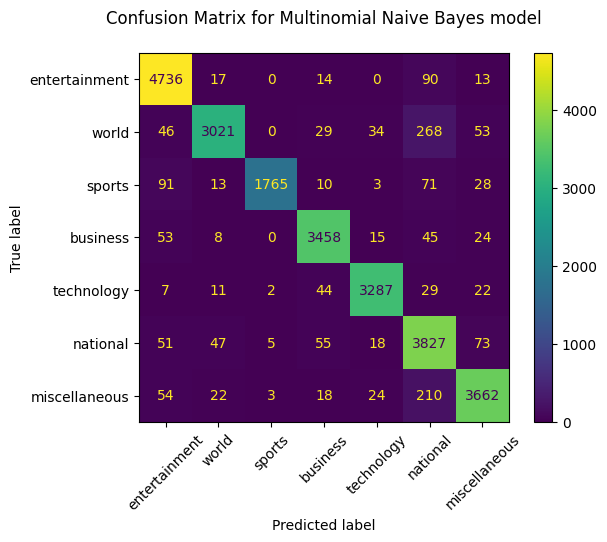

In [74]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels =News_Categories, xticks_rotation = 45)

plt.title('Confusion Matrix for Multinomial Naive Bayes model\n')
plt.show()

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:

Knn = KNeighborsClassifier(n_neighbors =3, metric = 'minkowski', p = 2)
Knn.fit(X_train,y_train)

Kpred=Knn.predict(X_test)

print("first 20 actual labels")
print(y_test.tolist()[:20])
print("first 20 predicted labels")
print(Kpred.tolist()[:20])

first 20 actual labels
[4, 2, 6, 4, 4, 0, 1, 1, 5, 1, 1, 5, 3, 5, 1, 5, 6, 1, 4, 2]
first 20 predicted labels
[4, 2, 6, 4, 4, 0, 1, 1, 6, 1, 6, 5, 3, 5, 1, 5, 6, 1, 4, 2]


In [77]:
KNN_ACC =  accuracy_score(y_test, Kpred)
print('Accuracy:', accuracy_score(y_test, Kpred))
print('Precision (Macro):', precision_score(y_test, Kpred, average = 'macro'))
print('Recall (Macro):', recall_score(y_test, Kpred, average = 'macro'))
print('F1 score (Macro):', f1_score(y_test, Kpred, average = 'macro'))

Accuracy: 0.8422131147540983
Precision (Macro): 0.9261738784550986
Recall (Macro): 0.8443074077559652
F1 score (Macro): 0.8567230770844437


In [78]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
Rf.fit(X_train,y_train)

pred=Rf.predict(X_test)

print("first 20 actual labels")
print(y_test.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

first 20 actual labels
[4, 2, 6, 4, 4, 0, 1, 1, 5, 1, 1, 5, 3, 5, 1, 5, 6, 1, 4, 2]
first 20 predicted labels
[4, 2, 6, 4, 4, 0, 1, 1, 5, 1, 1, 5, 3, 5, 1, 5, 6, 1, 4, 2]


In [79]:
print("F1 score of Rf:")
f1 = f1_score(y_test, pred, average='micro')
print(f1)
print("Accuracy of Rf:")
accuracy = accuracy_score(y_test, pred)
print(accuracy)
print("Accuracy of Rf in percentage:")
accuracy_percentage = round(accuracy * 100, 3)
print(accuracy_percentage, "%")

F1 score of Rf:
0.9855769230769231
Accuracy of Rf:
0.9855769230769231
Accuracy of Rf in percentage:
98.558 %


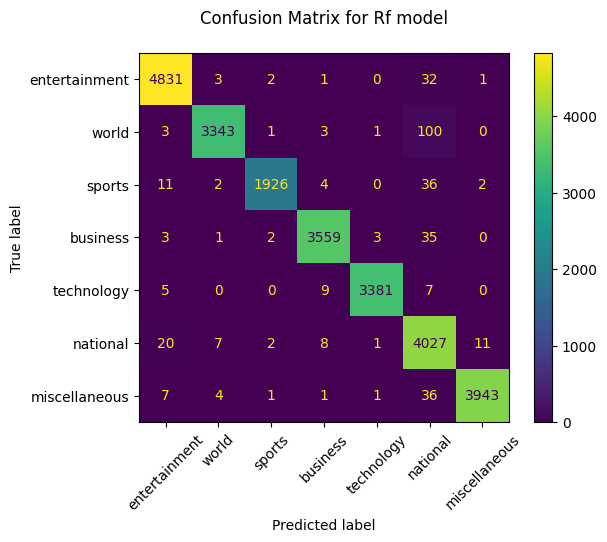

In [87]:
ConfusionMatrixDisplay.from_predictions(y_test,pred, display_labels =News_Categories, xticks_rotation = 45)

plt.title('Confusion Matrix for Rf model\n')
plt.show()

In [91]:
a=multinomial_nb.predict(tfidf.transform(["फीफा वर्ल्ड कप क्वॉलिफायर में अर्जेंटीना को कोलंबिया के खिलाफ 1-2 से हार का सामना करना पड़ा। स्टार फुटबॉलर लियोनल मेसी की कमी अर्जेंटीना को खली और इसका असर रिजल्ट पर भी देखने मिला"]))
b= multinomial_nb.predict(tfidf.transform(["वर्ल्ड कप 2011 में टीम इंडिया की ओर से टॉप 8 का हर एक बल्लेबाज कम से कम एक बार सिंगल डिजिट स्कोर पर आउट हो गया था, लेकिन सिर्फ गौतम गंभीर ही ऐसे थे, जिन्होंने हर बार दहाई का स्कोर पार किया था। "]))
c =Rf.predict(tfidf.transform(["फीफा वर्ल्ड कप क्वॉलिफायर में अर्जेंटीना को कोलंबिया के खिलाफ 1-2 से हार का सामना करना पड़ा। स्टार फुटबॉलर लियोनल मेसी की कमी अर्जेंटीना को खली और इसका असर रिजल्ट पर भी देखने मिला।"]))
d= Rf.predict(tfidf.transform(["वर्ल्ड कप 2011 में टीम इंडिया की ओर से टॉप 8 का हर एक बल्लेबाज कम से कम एक बार सिंगल डिजिट स्कोर पर आउट हो गया था, लेकिन सिर्फ गौतम गंभीर ही ऐसे थे, जिन्होंने हर बार दहाई का स्कोर पार किया था। "]))
print(a,b,c,d)

[2] [0] [2] [2]


In [93]:
a=multinomial_nb.predict(tfidf.transform(["नए न‍ियम के अनुसार न‍िवेशकों के ल‍िए यह स‍िस्‍टम पहले से बेहतर हो गया है. सुबह 11 बजे तक जमा किया गया डी-रेमिट पैसा भी उसी दिन निवेश कर दिया जाएगा और वह भी उस दिन के लागू नेट एसेट वैल्यू (NAV) के हिसाब से."]))
b= multinomial_nb.predict(tfidf.transform(["अगर आप भी आईपीओ के जर‍िये शेयर मार्केट में न‍िवेश करते हैं तो यह खबर आपको खुश कर देगी. जी हां, इलेक्ट्रिक टू-व्‍हीलर न‍िर्माता ओला इलेक्ट्रिक और दवा कंपनी एमक्योर फार्मास्युटिकल्स को वित्त जुटाने के लिए मार्केट रेग्‍युलेटर सेबी से इनीश‍ियल प्राइस ऑफर‍िंग (IPO) लाने की मंजूरी मिल गई है"]))
c =Rf.predict(tfidf.transform(["नए न‍ियम के अनुसार न‍िवेशकों के ल‍िए यह स‍िस्‍टम पहले से बेहतर हो गया है. सुबह 11 बजे तक जमा किया गया डी-रेमिट पैसा भी उसी दिन निवेश कर दिया जाएगा और वह भी उस दिन के लागू नेट एसेट वैल्यू (NAV) के हिसाब से."]))
d= Rf.predict(tfidf.transform(["अगर आप भी आईपीओ के जर‍िये शेयर मार्केट में न‍िवेश करते हैं तो यह खबर आपको खुश कर देगी. जी हां, इलेक्ट्रिक टू-व्‍हीलर न‍िर्माता ओला इलेक्ट्रिक और दवा कंपनी एमक्योर फार्मास्युटिकल्स को वित्त जुटाने के लिए मार्केट रेग्‍युलेटर सेबी से इनीश‍ियल प्राइस ऑफर‍िंग (IPO) लाने की मंजूरी मिल गई है "]))
print(a,b,c,d)

[1] [3] [5] [3]


In [82]:
import joblib


In [83]:
joblib.dump(tfidf, "hindiTokenization.joblib")
joblib.dump(tfidf, "hindiTokenization.pkl")

['hindiTokenization.pkl']

In [84]:
joblib.dump(multinomial_nb,"hindi_Multi.joblib")
joblib.dump(multinomial_nb,"hindi_Multi.pkl")

['hindi_Multi.pkl']

In [94]:
joblib.dump(Rf,"hindi_Rf.joblib")
joblib.dump(Rf,"hindi_Rf.pkl")

['hindi_Rf.pkl']